In [22]:
import pandas as pd
import numpy as np
from numpy import argmax
from sklearn import metrics
import matplotlib
from matplotlib import rcParams
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import seaborn as sns

%matplotlib inline

In [23]:

data = pd.read_csv('data/brca.csv')
data

,Unnamed: 0,slideID,mean_score,median_score,__set_TGFb-CAF,PatientID,Indication,tgfb_caf_pos,Class,model_prediction,train_set,val_set,test_set
0,0,26524,0.832574,0.618730,-0.784089,TCGA-PL-A8LY,BRCA,0,False,0,True,False,False
1,1,75662,0.898555,0.421335,0.403073,TCGA-BH-A18S,BRCA,0,False,0,True,False,False
2,2,75663,0.892223,0.591193,0.472125,TCGA-OL-A66H,BRCA,0,False,0,True,False,False
3,3,80086,0.811399,0.577158,0.881157,TCGA-A7-A4SC,BRCA,0,False,0,False,False,True
4,4,80092,0.967081,0.701753,1.722477,TCGA-D8-A1Y2,BRCA,1,True,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,990,91896,0.990784,0.736060,1.144190,TCGA-AR-A1AS,BRCA,1,True,1,True,False,False
991,991,91897,0.944577,0.613036,1.029847,TCGA-C8-A1HL,BRCA,1,True,0,False,False,True
992,992,91901,0.940992,0.591882,0.468268,TCGA-LQ-A4E4,BRCA,0,False,0,False,True,False
993,993,91908,0.973691,0.628968,0.940389,TCGA-AN-A0FF,BRCA,0,False,0,True,False,False


In [24]:
val_data = data[data['val_set']]
test_data = data[data['test_set']]
test_data

,Unnamed: 0,slideID,mean_score,median_score,__set_TGFb-CAF,PatientID,Indication,tgfb_caf_pos,Class,model_prediction,train_set,val_set,test_set
3,3,80086,0.811399,0.577158,0.881157,TCGA-A7-A4SC,BRCA,0,False,0,False,False,True
9,9,80130,0.984065,0.706197,1.370765,TCGA-EW-A1P6,BRCA,1,True,1,False,False,True
10,10,80131,0.933399,0.590997,0.665452,TCGA-AR-A1AJ,BRCA,0,False,0,False,False,True
12,12,80145,0.964596,0.533680,-0.194212,TCGA-AC-A62X,BRCA,0,False,0,False,False,True
14,14,80156,0.961227,0.586648,1.238755,TCGA-A7-A6VY,BRCA,1,True,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,973,91598,0.976043,0.750127,1.378492,TCGA-AC-A23H,BRCA,1,True,1,False,False,True
975,975,91653,0.936491,0.636181,-0.498820,TCGA-E9-A5UP,BRCA,0,False,0,False,False,True
978,978,91702,0.960168,0.567939,-0.029264,TCGA-AO-A0J3,BRCA,0,False,0,False,False,True
988,988,91871,0.963903,0.694148,1.591558,TCGA-XX-A89A,BRCA,1,True,1,False,False,True


In [25]:
y = val_data.Class
pred = val_data.median_score
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
roc_auc=metrics.auc(fpr, tpr)


In [26]:
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]

/tmp/ipykernel_4879/686370750.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


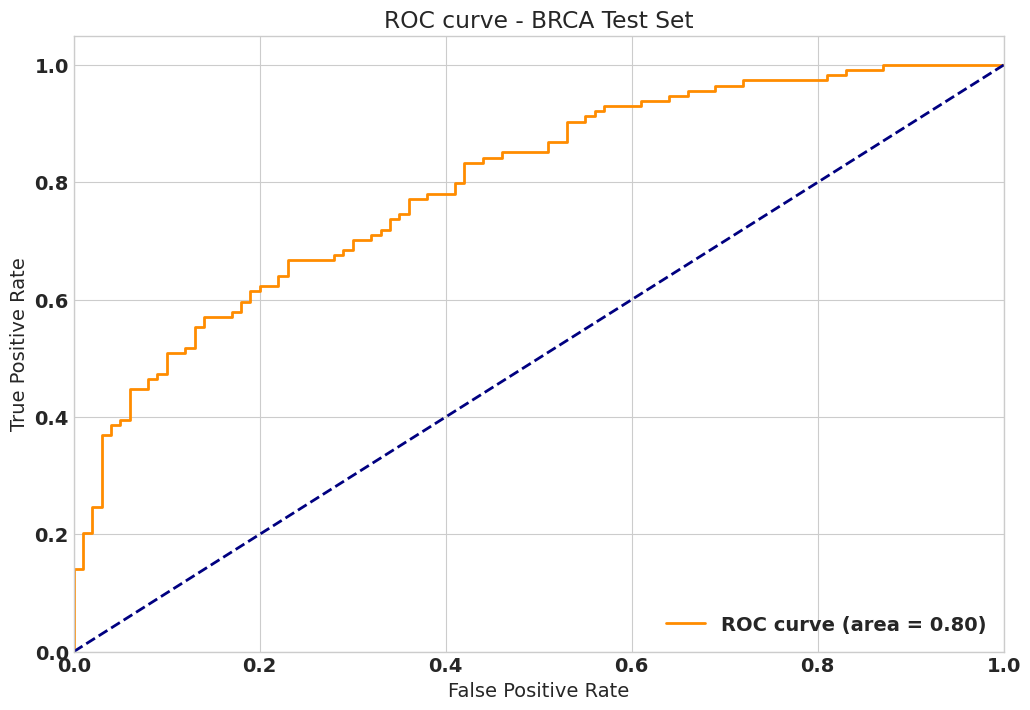

In [27]:
y = test_data.Class
pred = test_data.median_score
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
roc_auc=metrics.auc(fpr, tpr)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

rcParams['figure.figsize'] = 12,8
plt.style.use('seaborn-whitegrid')
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC curve - BRCA Test Set")
plt.legend(loc="lower right")

plt.show()

[Text(0.5, 58.583333333333314, 'Model Prediction'),
 Text(120.58333333333333, 0.5, 'Ground Truth'),
 Text(0.5, 1.0, 'Validation')]

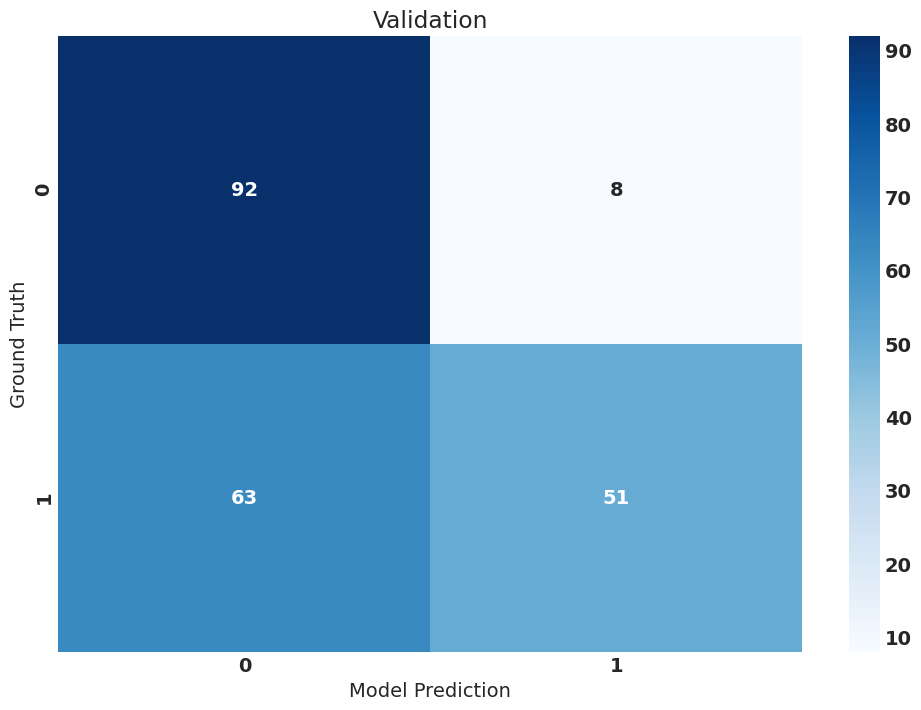

In [28]:
y_pred = (pred>best_thresh)*1
ax = sns.heatmap(confusion_matrix(y,y_pred), annot=True, cmap='Blues')
ax.set(xlabel='Model Prediction',ylabel='Ground Truth', title='Validation')

[Text(0.5, 0, 'Ground Truth'),
 Text(0, 0.5, 'Model Score'),
 Text(0.5, 1.0, 'BRCA Test Set')]

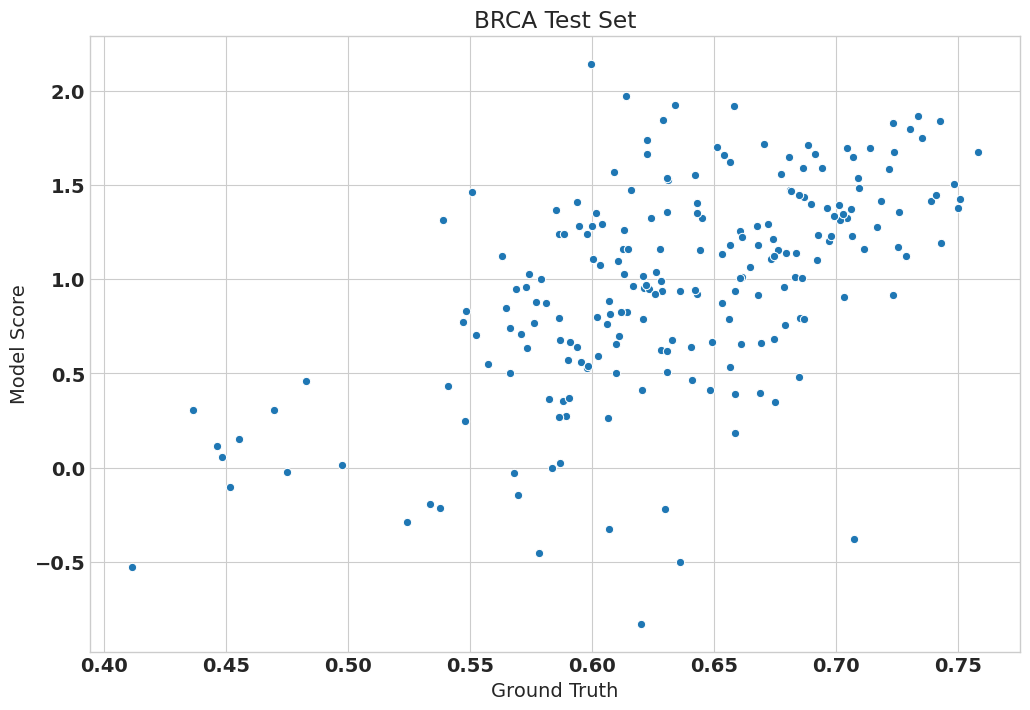

In [29]:
gt = test_data['__set_TGFb-CAF'].values

ax = sns.scatterplot(pred, gt)
ax.set(xlabel='Ground Truth',ylabel='Model Score', title='BRCA Test Set')